# HSV & Gabor Tests

In [1]:
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../..')

import libtools

---

### DATA

In [3]:
FILE = "../../data/images/coco/theatre.png"

In [4]:
img = np.array(PIL.Image.open(FILE).convert('L'), dtype=float)
# img = libtools.downsample(img, 2) # Downsample
img /= np.max(img)

In [5]:
f = np.fft.fft2(img) # Frequency transform
fshift = np.fft.fftshift(f) # Shift zero frequency component (DC-component)
power = np.abs(fshift) # Process complex numbers
phase = np.angle(fshift)

In [6]:
# Define radial distance
nx, ny = power.shape
x = np.arange(-power.shape[0]//2, power.shape[0]//2)
y = np.arange(-power.shape[1]//2, power.shape[1]//2)
X, Y = np.meshgrid(x, y)
dist = np.sqrt(X**2 + Y**2)

# Compute spatial frequency
hist, bins = np.histogram(dist.flatten(), bins=np.arange(dist.max()), weights=power.flatten())
score = np.argmax(hist, axis=0)
print('Freqency at which power is greatest:', score)

Freqency at which power is greatest: 1


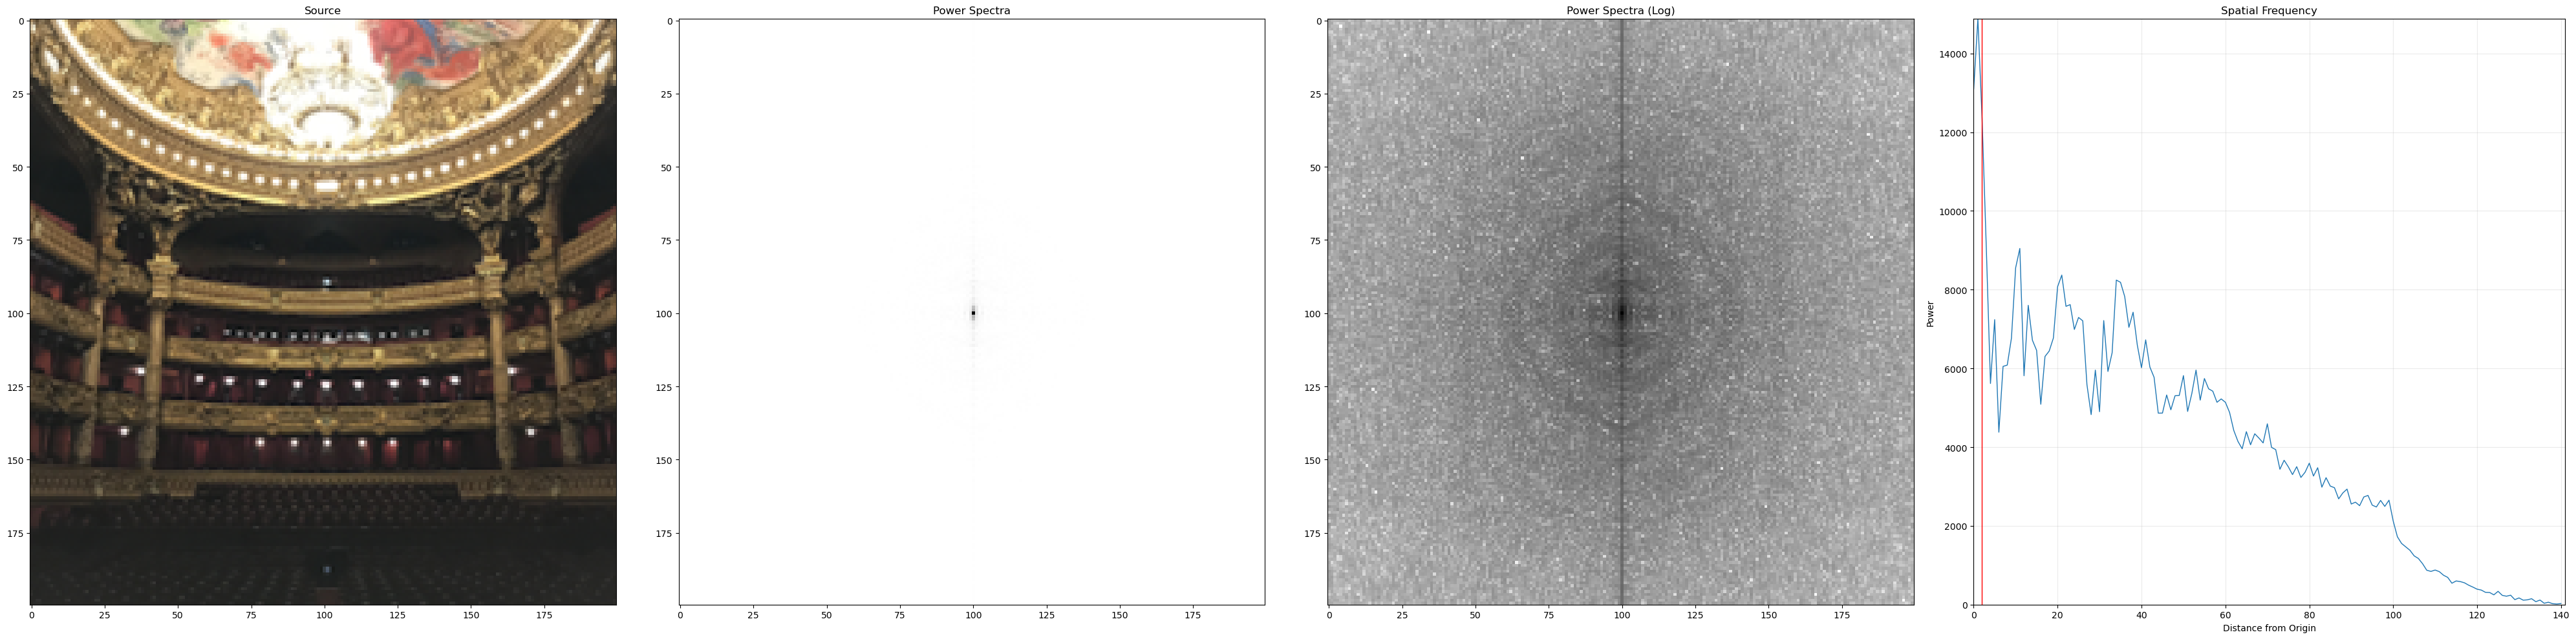

In [7]:
plt.figure(figsize=(40,10))
plt.subplot(1,4,1)
plt.imshow(PIL.Image.open(FILE))
plt.title('Source')

plt.subplot(1,4,2)
plt.imshow(power, 'binary')
plt.title('Power Spectra')

plt.subplot(1,4,3)
plt.imshow(np.log(power), 'binary')
plt.title('Power Spectra (Log)')

plt.subplot(1,4,4)
plt.plot(bins[:-1], hist, lw=1)
plt.vlines(score+1, 0, hist[1:].max(), linewidth=1, color='r')
plt.title('Spatial Frequency')
plt.xlabel('Distance from Origin'), plt.ylabel('Power')
plt.xlim([0,int(dist.max())]), plt.ylim([0,int(hist[1:].max())])
plt.grid(alpha=0.25)
plt.tight_layout()

In [8]:
freq = 20 # Orientation wavelength = 2x | Gabor size = 1x

In [9]:
src = libtools.preference_map(16, freq*2, img.shape[0])

print('Map:', src.shape)
print('min:', f"{src.min():.2f}", 'max:', f"{src.max():.2f}")

Map: (200, 200)
min: 0.00 max: 6.28


In [10]:
features = libtools.gabor_conv(img, src, step=int(freq)) # Power of spatial frequency FFT (No multiplicative factor)
features /= np.max(features)

print('Features:', features.shape)
print('min:', f"{features.min():.2f}", 'max:', f"{features.max():.2f}")

Features: (200, 200)
min: 0.00 max: 1.00


In [11]:
def grade(ch1, ch2, ch3):
    map = np.zeros([ch1.shape[0],ch1.shape[1],3])
    for i in range(ch1.shape[0]):
        for j in range(ch1.shape[1]):
            map[i,j,:] = libtools.HSV2RGB(ch1[i,j], ch2, ch3[i,j])
    return map

In [12]:
hsv_features = libtools.grade(src/(2*np.pi), 1.0, features.reshape(src.shape))

---

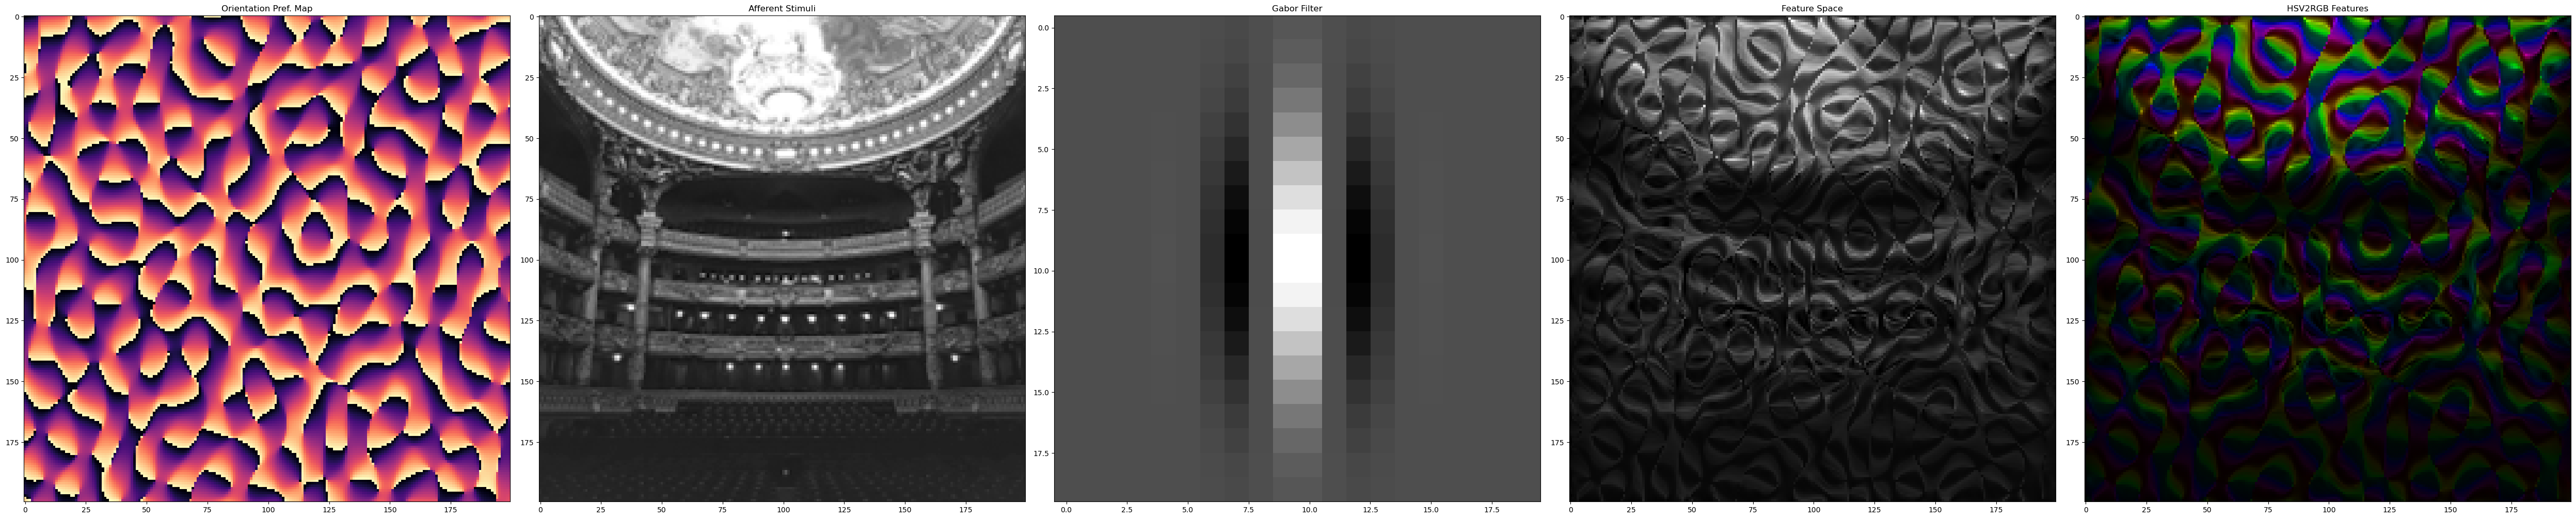

In [13]:
plt.figure(figsize=(50,10))
plt.subplot(1, 5, 1)
plt.imshow(src, 'magma')
plt.title('Orientation Pref. Map')

plt.subplot(1, 5, 2)
plt.imshow(img, 'gray')
plt.title('Afferent Stimuli')

plt.subplot(1, 5, 3)
plt.imshow(libtools.gabor_filter(1,2,0, samples=int(freq)), 'gray')
plt.title('Gabor Filter')

plt.subplot(1, 5, 4)
plt.imshow(features, 'gray')
plt.title('Feature Space')

plt.subplot(1, 5, 5)
plt.imshow(hsv_features)
plt.title("HSV2RGB Features")
plt.tight_layout()

---

### SIMPLE GEOMETRY

In [14]:
m = np.array([[0,0,0,0,0],
              [0,0,1,0,0],
              [0,0,1,0,0],
              [0,0,1,0,0],
              [0,0,0,0,0]])

k = 40
m = np.concatenate([np.concatenate([[x]*k for x in y]*k) for y in m]).reshape(k*m.shape[0],k*m.shape[1]).astype('float64')

In [15]:
features = libtools.gabor_conv(m, src, step=freq)
features /= np.max(features)

print('Features:', features.shape)
print('min:', f"{features.min():.2f}", 'max:', f"{features.max():.2f}")

Features: (200, 200)
min: 0.00 max: 1.00


In [16]:
hsv_features = libtools.grade(src/(2*np.pi), 1.0, features.reshape(src.shape))

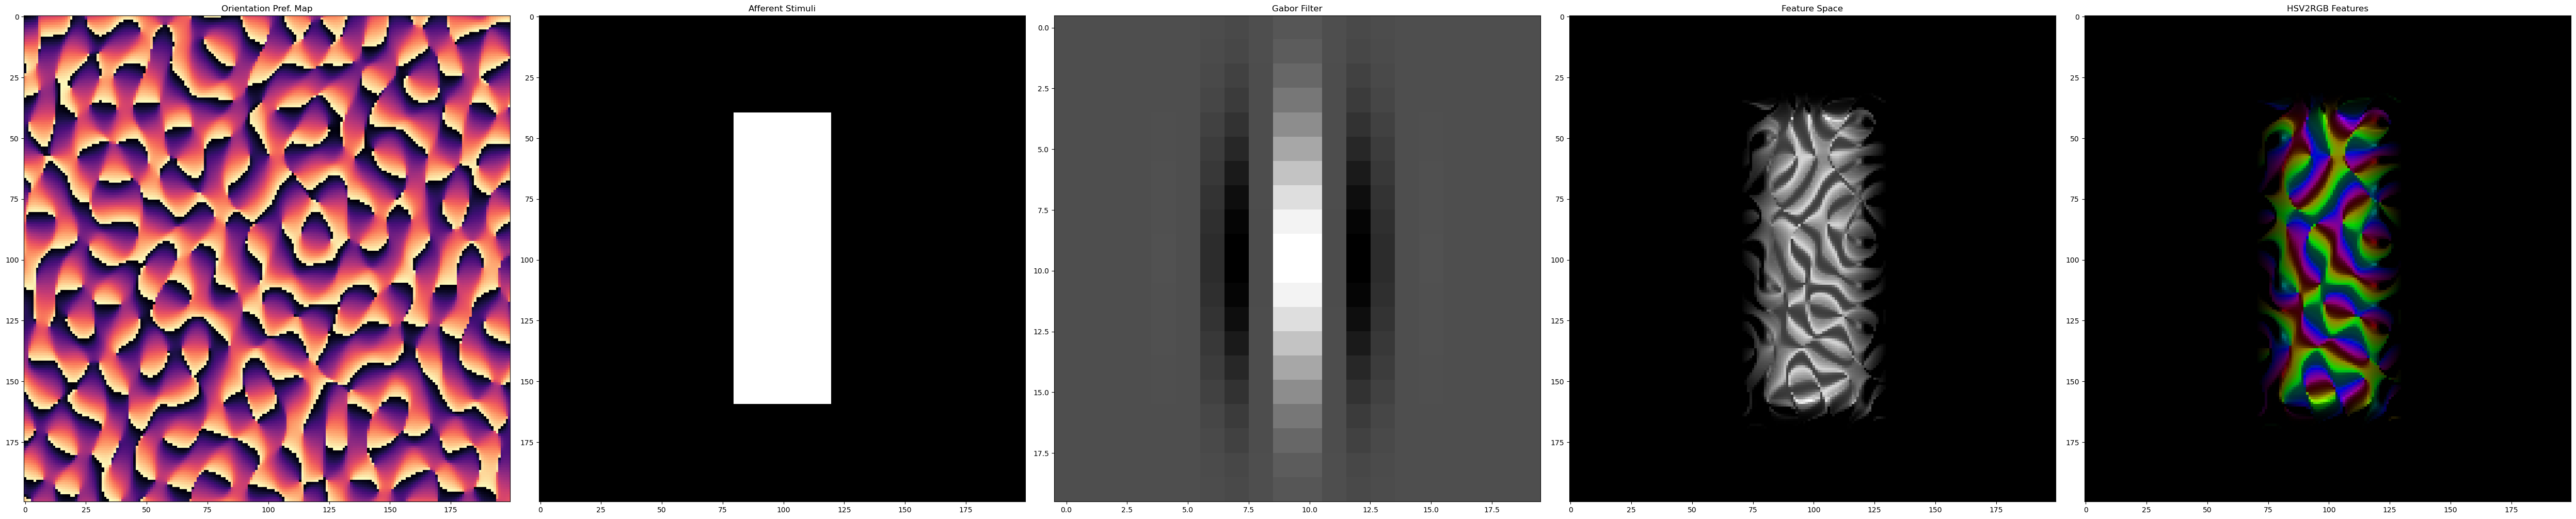

In [17]:
plt.figure(figsize=(50,10))
plt.subplot(1, 5, 1)
plt.imshow(src, 'magma')
plt.title('Orientation Pref. Map')

plt.subplot(1, 5, 2)
plt.imshow(m, 'gray')
plt.title('Afferent Stimuli')

plt.subplot(1, 5, 3)
plt.imshow(libtools.gabor_filter(1,2,0, samples=freq), 'gray')
plt.title('Gabor Filter')

plt.subplot(1, 5, 4)
plt.imshow(features, 'gray')
plt.title('Feature Space')

plt.subplot(1, 5, 5)
plt.imshow(hsv_features)
plt.title("HSV2RGB Features")
plt.tight_layout()